In [1]:
import sys, os, time
import numpy as np
from tqdm import tqdm_notebook as tqdm
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
# from foundation import util, models, train

In [10]:
overlap_path = 'oie_overlap.pth.tar'
consis_path = 'oie_consis.pth.tar'
data_path = '../../oie_table.pth.tar'

In [14]:
overlap = torch.load(overlap_path)
consis = torch.load(consis_path)
overlap.shape, consis.shape

(torch.Size([3793]), torch.Size([3793]))

<IPython.core.display.Javascript object>


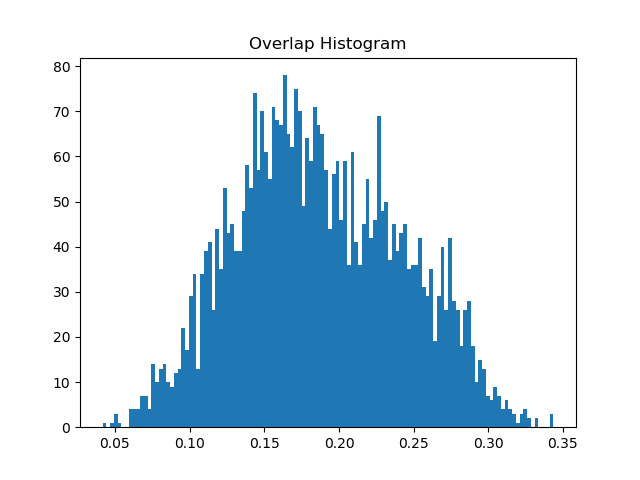

In [17]:
plt.figure()
plt.hist(overlap.numpy(), bins=120)
plt.title('Overlap Histogram')
pass

<IPython.core.display.Javascript object>


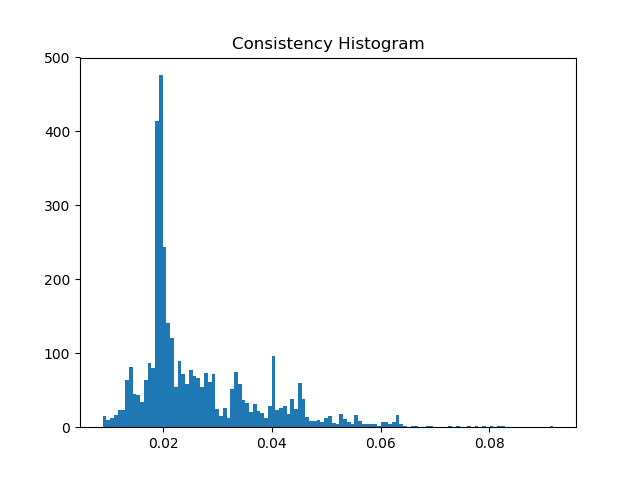

In [18]:
plt.figure()
plt.hist(consis.numpy(), bins=120)
plt.title('Consistency Histogram')
pass

In [ ]:
ind = torch.arange(len(consis))

In [26]:
o_threshold = 0.2

opass = ind[overlap < o_threshold]
len(opass)

2299

In [27]:
c_threshold = 0.032

cpass = ind[consis > c_threshold]
len(cpass)

977

In [29]:
passed = np.array(list(set(opass.numpy()).intersection(set(cpass.numpy()))))
len(passed)

651

In [31]:
oie = torch.load('../../oie_table.pth.tar')
full = np.array(oie['rows'])

In [33]:

rows = full[passed]
rows.shape

(651, 3)

In [36]:
unordelm = set(rows.reshape(-1))
len(unordelm)

751

In [43]:
idx, elements = list(zip(*[(i,e) for i,e in enumerate(oie['elements']) if e in unordelm]))

In [47]:
accepted = {}
accepted['elements'] = elements
accepted['rows'] = rows
accepted['vecs'] = oie['vecs'][list(idx)]

In [48]:
accepted['vecs'].shape, len(accepted['rows']), len(accepted['elements'])

((751, 300), 651, 751)

In [49]:
# torch.save(accepted, '../../filtered.pth.tar')